In [1]:
## Built-in modules
import os

## Third party modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import OrderedDict
%matplotlib inline

## Load VIUS 2021 Dataset

In [2]:
path_to_data = '**/VIUS_Fleet_and_Emission' 
# please change this to the local directory where the data folder is located
os.chdir(path_to_data)
df = pd.read_csv('Input/vius_2021_puf.csv')

In [3]:
# Only retain vehicles engaged in "some commercial activity"

df = df[df['BUSRELATED'] == 1]

In [4]:
df.head()

,ID,TABWEIGHT,REGSTATE,ACQUIREYEAR,ACQUISITION,AVGWEIGHT,BRAKES,BTYPE,BUSRELATED,CAB,...,TE_SIDESKIRTS,TE_UCAERODEV,TOTLENGTH,TOWCAPACITY,TRANSMISSION,TRIPOFFROAD,TRUCKLOADPCT,TTYPE,VEHTYPE,WEIGHOUTPCT
0,1,38.5,MT,11,2,14,3,X,1,X,...,2,2,14,6,2,0,X,08,TT,40
1,2,197.4,NC,Z,2,12,3,X,1,X,...,2,2,12,4,2,0,25,05,TT,40
7,8,182.3,NJ,09,2,11,3,X,1,X,...,2,2,05,4,2,15,X,08,TT,0
8,9,85.9,LA,Z,2,12,3,X,1,X,...,2,2,09,4,2,NaN,X,07,TT,X
9,10,240.2,OH,19,1,12,3,X,1,X,...,1,2,10,5,1,5,82,08,TT,0


In [5]:
df.shape

(38584, 168)

### Decoding dataset

In [6]:
# Create index dictionary for categorical variables

df_index= pd.read_excel('Parameter/vius-2021-puf-data-dictionary_categorical_decoding.xlsx')

df_index['Code'] = df_index['Code'].astype(str) # run with this line of code first then run another time without this line of code

In [7]:
categorical_dict = {field: {row['Code']: row['Values'] for index, row in group.iterrows()} 
                    for field, group in df_index.groupby('Field')}

In [8]:
df = df.replace(categorical_dict)

In [9]:
df_index= pd.read_excel('Parameter/vius-2021-puf-data-dictionary_categorical_decoding.xlsx')

#df_index['Code'] = df_index['Code'].astype(str) # run with this line of code first then run another time without this line of code

In [10]:
categorical_dict = {field: {row['Code']: row['Values'] for index, row in group.iterrows()} 
                    for field, group in df_index.groupby('Field')}

In [11]:
df = df.replace(categorical_dict)

In [12]:
# Create index dictionary for numerical variables

numerical_dict = {"DEADHEADPCT": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "HAZPCT": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "JU_CANADA": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "JU_HOMEBASE": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "JU_MEXICO": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "JU_OTHERST": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "LOADEDPCT": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "LTRUCKLOADPCT": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "MILESLIFE": {'X': "Not applicable (see 'Applicable Vehicles')"},
                  "MPG": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "REPOSITIONPCT": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "RO_0_50": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "RO_101_200": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "RO_201_500": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "RO_51_100": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "RO_GT500": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "TRIPOFFROAD": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "TRUCKLOADPCT": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                  "WEIGHOUTPCT": {np.nan : 'Not Reported', 'X': "Not applicable (see 'Applicable Vehicles')"},
                 }
df = df.replace(numerical_dict)

In [13]:
df.head()

,ID,TABWEIGHT,REGSTATE,ACQUIREYEAR,ACQUISITION,AVGWEIGHT,BRAKES,BTYPE,BUSRELATED,CAB,...,TE_SIDESKIRTS,TE_UCAERODEV,TOTLENGTH,TOWCAPACITY,TRANSMISSION,TRIPOFFROAD,TRUCKLOADPCT,TTYPE,VEHTYPE,WEIGHOUTPCT
0,1,38.5,Montana,2011,Used,"100,001 to 130,000 pounds",Air,Not applicable (see 'Applicable Vehicles'),Some commercial activity,Not applicable (see 'Applicable Vehicles'),...,No,No,80.0 feet or more,Not reported,Manual,0,Not applicable (see 'Applicable Vehicles'),"Flatbed, platform",Truck tractor,40
1,2,197.4,North Carolina,Not reported,Used,"60,001 to 80,000 pounds",Air,Not applicable (see 'Applicable Vehicles'),Some commercial activity,Not applicable (see 'Applicable Vehicles'),...,No,No,70.0 to 74.9 feet,"26,000 to 59,999 pounds",Manual,0,25,Container,Truck tractor,40
7,8,182.3,New Jersey,2009,Used,"50,001 to 60,000 pounds",Air,Not applicable (see 'Applicable Vehicles'),Some commercial activity,Not applicable (see 'Applicable Vehicles'),...,No,No,05,"26,000 to 59,999 pounds",Manual,15,Not applicable (see 'Applicable Vehicles'),"Flatbed, platform",Truck tractor,0
8,9,85.9,Louisiana,Not reported,Used,"60,001 to 80,000 pounds",Air,Not applicable (see 'Applicable Vehicles'),Some commercial activity,Not applicable (see 'Applicable Vehicles'),...,No,No,09,"26,000 to 59,999 pounds",Manual,Not Reported,Not applicable (see 'Applicable Vehicles'),Dump,Truck tractor,Not applicable (see 'Applicable Vehicles')
9,10,240.2,Ohio,2019,New,"60,001 to 80,000 pounds",Air,Not applicable (see 'Applicable Vehicles'),Some commercial activity,Not applicable (see 'Applicable Vehicles'),...,Yes,No,60.0 to 64.9 feet,"60,000 pounds or more",Automatic,5,82,"Flatbed, platform",Truck tractor,0


### Variable Generation

In [14]:
# Fix 'MODELYEAR' issue during decoding 

df.loc[df['MODELYEAR'] == '00', 'MODELYEAR'] = 2000
df.loc[df['MODELYEAR'] == '01', 'MODELYEAR'] = 2001
df.loc[df['MODELYEAR'] == '02', 'MODELYEAR'] = 2002
df.loc[df['MODELYEAR'] == '03', 'MODELYEAR'] = 2003
df.loc[df['MODELYEAR'] == '04', 'MODELYEAR'] = 2004
df.loc[df['MODELYEAR'] == '05', 'MODELYEAR'] = 2005
df.loc[df['MODELYEAR'] == '06', 'MODELYEAR'] = 2006
df.loc[df['MODELYEAR'] == '07', 'MODELYEAR'] = 2007
df.loc[df['MODELYEAR'] == '08', 'MODELYEAR'] = 2008
df.loc[df['MODELYEAR'] == '09', 'MODELYEAR'] = 2009

In [15]:
# Vehicle age

df['VINTAGE'] = 2021-df['MODELYEAR']

# Define bins and labels
bins = [-float('inf'), 3, 5, 7, 9, 14, 19, float('inf')]
labels = ['age<=3', '3<age<=5', '3<age<=7', '7<age<=9', '9<age<=14', '14<age<=19','age>19']

# Create age_bin variable
df['AGE_BIN'] = pd.cut(df['VINTAGE'], bins=bins, labels=labels, include_lowest=True, right=True)

df['AGE_BIN'].value_counts().sort_index()

AGE_BIN
age<=3        8928
3<age<=5      4327
3<age<=7      3558
7<age<=9      2638
9<age<=14     5230
14<age<=19    5900
age>19        8003
Name: count, dtype: int64

In [16]:
df['weighted_VMT'] = df['MILESANNL'] * df['TABWEIGHT']

## Vehicle Class Crosswalk

In [17]:
# For US VIUS data, assign vehicle class into 4 groups:
# Class 1-2 -> light-duty truck
# Class 3-5 -> medium-duty truck
# Class 6 -> MDT in SynthFirm, can be HDT in MOVES
# Class 7-8 -> mostly HDT

GVWR_dict = {'1': 'Class 1-2', '2A': 'Class 1-2', '2B': 'Class 1-2', '3': 'Class 3-5', '4': 'Class 3-5', '5': 'Class 3-5', '6': 'Class 6', '7': 'Class 7-8',
             '8': 'Class 7-8'}

df['VEH_CLASS_4'] = (df.GVWR_CLASS).replace(GVWR_dict)

### SynthFirm Vehicle Class Mapping

In [18]:
# For each class 2b-8 truck, create the additional bins for the crosswalk:
# SUT/CT -> for mapping with MOVES ('VEHTYPE')
# Short-haul (daily mileage <= 200 mi) V.S. long haul (daily mileage > 200 mi)  -> for mapping with MOVES
# In MOVES, 'If the tractor-trailer’s primary trip length is greater than 200 miles, then it is considered long-haul.'
# If 'RO_101_200'+'RO_201_500'+'RO_GT500' > 0.5, define it as "long haul"
# MDT = (class 3-6); HDT = (class 7-8); LDT = (class 2b); -> for mapping with SynthFirm
# vocational/tractor label based on the crosswalk below -> for mapping with SynthFirm

df['SHORT_HAUL'] = (df['MILESANNL'] <= 73000).astype(int)

df.RO_101_200 = pd.to_numeric(df.RO_101_200, errors='coerce') # convert back to numeric variable
df.RO_201_500 = pd.to_numeric(df.RO_201_500, errors='coerce')
df.RO_GT500 = pd.to_numeric(df.RO_GT500, errors='coerce')
df['RO_GT100'] = df['RO_101_200']+df['RO_201_500']+df['RO_GT500']
df.loc[df['RO_GT100'] >= 50, 'SHORT_HAUL'] = 0

GVWR_dict = {'1': 'LDT', '2A': 'LDT', '2B': 'LDT', '3': 'MDT', '4': 'MDT', '5': 'MDT', '6': 'MDT', '7': 'HDT', '8': 'HDT'}
df['VEH_CLASS_SynthF'] = (df.GVWR_CLASS).replace(GVWR_dict)

df['VEH_CLASS_SynthF'].value_counts()

VEH_CLASS_SynthF
HDT    23516
MDT    11945
LDT     3123
Name: count, dtype: int64

In [19]:
df['VEH_CLASS_SynthFirm'] = np.where((df['VEH_CLASS_SynthF'] == "HDT") & (df['VEHTYPE'] == "Single unit vehicle"), "HDT vocational",
                            np.where((df['VEH_CLASS_SynthF'] == "HDT") & (df['VEHTYPE'] == "Truck tractor"), "HDT tractor",
                            np.where((df['VEH_CLASS_SynthF'] == "MDT") & (df['VEHTYPE'] == "Single unit vehicle"), "MDT vocational",
                            np.where((df['VEH_CLASS_SynthF'] == "LDT") & (df['VEHTYPE'] == "Single unit vehicle"), "LDT vocational", "NA"))))

df['VEH_CLASS_SynthFirm'].value_counts()  

VEH_CLASS_SynthFirm
HDT tractor       13145
MDT vocational    11945
HDT vocational    10371
LDT vocational     3123
Name: count, dtype: int64

### NEW SynthFirm Vehicle Class Mapping 

In [20]:
df['VEH_CLASS_SynthFirm_new'] = np.where((df['VEH_CLASS_SynthF'] == "HDT") & (df['VEHTYPE'] == "Single unit vehicle"), "Heavy-duty Vocational",
                            np.where((df['VEH_CLASS_SynthF'] == "HDT") & (df['VEHTYPE'] == "Truck tractor"), "Heavy-duty Tractor",
                            np.where((df['VEH_CLASS_SynthF'] == "MDT") & (df['GVWR_CLASS'] != "3"), "Medium-duty Vocational",   
                            np.where((df['GVWR_CLASS'] == "1") | (df['GVWR_CLASS'] == "2A"), "Light-duty Class12A",
                            np.where((df['GVWR_CLASS'] == "2B") | (df['GVWR_CLASS'] == "3"), "Light-duty Class2B3", "NA"))))) #The original MDT include Class 3, remove it here

df['VEH_CLASS_SynthFirm_new'].value_counts()  

VEH_CLASS_SynthFirm_new
Heavy-duty Tractor        13145
Heavy-duty Vocational     10371
Medium-duty Vocational     7530
Light-duty Class2B3        5992
Light-duty Class12A        1546
Name: count, dtype: int64

In [21]:
# Define the specific order for the 'Category' column
new_order = ['Light-duty Class12A', 'Light-duty Class2B3', 'Medium-duty Vocational','Heavy-duty Vocational','Heavy-duty Tractor']

# Convert 'Category' to a categorical type with the defined order
df['VEH_CLASS_SynthFirm_new'] = pd.Categorical(df['VEH_CLASS_SynthFirm_new'], categories=new_order, ordered=True)

In [22]:
pd.crosstab(df['VEH_CLASS_SynthFirm_new'], df['VEHTYPE'])

VEHTYPE,Single unit vehicle,Truck tractor
VEH_CLASS_SynthFirm_new,,
Light-duty Class12A,1546,0
Light-duty Class2B3,5992,0
Medium-duty Vocational,7530,0
Heavy-duty Vocational,10371,0
Heavy-duty Tractor,0,13145


### MOVES Vehicle Class Mapping

In [23]:
# For class 2b, differentiate if it is a light-duty commercial truck or a single-unit truck
# Single-unit MDT truck: with two axles or more and at least six tires
# LDT commercial truck: if not a single-unit truck

df_2b = df[df['GVWR_CLASS'] == "2B"]
pd.crosstab(df_2b['DRIVEAXLES'], df_2b['REARAXLETIRES'])

REARAXLETIRES,Four,Not reported,Two
DRIVEAXLES,,,
Not reported,3,24,34
One driving axle,227,3,847
Three or more driving axles,0,0,5
Two driving axles,63,0,371


In [24]:
df['SUT_2B_def'] = ((df['DRIVEAXLES'] == "Two driving axles") & (df['REARAXLETIRES'] == "Four") |
                 (df['DRIVEAXLES'] == "Three or more driving axles") & (df['REARAXLETIRES'] == "Four")).astype(int)

df.loc[df['GVWR_CLASS'] != "2B", 'SUT_2B_def'] = np.nan # fill N/A for non 2b observations

In [25]:
df['VEH_CLASS_MOVES'] = np.where((df['GVWR_CLASS'] == "1"), "Light commercial truck",
                        np.where((df['GVWR_CLASS'] == "2A"), "Light commercial truck",
                        np.where((df['GVWR_CLASS'] == "2B") & (df['SUT_2B_def'] == 1) & (df['SHORT_HAUL'] == 1), "Single-unit short-haul truck",
                        np.where((df['GVWR_CLASS'] == "2B") & (df['SUT_2B_def'] == 1) & (df['SHORT_HAUL'] == 0), "Single-unit long-haul truck",
                        np.where((df['GVWR_CLASS'] == "2B") & (df['SUT_2B_def'] == 0), "Light commercial truck",
                        np.where((df['VEH_CLASS_4'] == "Class 3-5") & (df['SHORT_HAUL'] == 1), "Single-unit short-haul truck",
                        np.where((df['VEH_CLASS_4'] == "Class 3-5") & (df['SHORT_HAUL'] == 0), "Single-unit long-haul truck",
                        np.where((df['VEH_CLASS_4'] == "Class 6") & (df['SHORT_HAUL'] == 1) & (df['VEHTYPE'] == "Single unit vehicle"), "Single-unit short-haul truck",
                        np.where((df['VEH_CLASS_4'] == "Class 6") & (df['SHORT_HAUL'] == 1) & (df['VEHTYPE'] == "Truck tractor"), "Combination short-haul truck",
                        np.where((df['VEH_CLASS_4'] == "Class 6") & (df['SHORT_HAUL'] == 0) & (df['VEHTYPE'] == "Single unit vehicle"), "Single-unit long-haul truck",
                        np.where((df['VEH_CLASS_4'] == "Class 6") & (df['SHORT_HAUL'] == 0) & (df['VEHTYPE'] == "Truck tractor"), "Combination long-haul truck",
                        np.where((df['VEH_CLASS_4'] == "Class 7-8") & (df['SHORT_HAUL'] == 1) & (df['VEHTYPE'] == "Single unit vehicle"), "Single-unit short-haul truck",
                        np.where((df['VEH_CLASS_4'] == "Class 7-8") & (df['SHORT_HAUL'] == 1) & (df['VEHTYPE'] == "Truck tractor"), "Combination short-haul truck",
                        np.where((df['VEH_CLASS_4'] == "Class 7-8") & (df['SHORT_HAUL'] == 0) & (df['VEHTYPE'] == "Single unit vehicle"), "Single-unit long-haul truck",
                        np.where((df['VEH_CLASS_4'] == "Class 7-8") & (df['SHORT_HAUL'] == 0) & (df['VEHTYPE'] == "Truck tractor"), "Combination long-haul truck", "NA")))))))))))))))

df['VEH_CLASS_MOVES'].value_counts() 

VEH_CLASS_MOVES
Single-unit short-haul truck    20756
Combination short-haul truck     6789
Combination long-haul truck      6356
Light commercial truck           3060
Single-unit long-haul truck      1623
Name: count, dtype: int64

## Range of Operation 

### Avg. RO

In [26]:
# Calculate weighted average RO for each truck (take the median to represent the range) 
# For "RO_GT500", use 1,000 miles as the repreesntative value (the avergage between 500 and the max distance from CFS for-hire sample)

df.RO_0_50 = pd.to_numeric(df.RO_0_50, errors='coerce') # convert back to numeric variable
df.RO_51_100 = pd.to_numeric(df.RO_51_100, errors='coerce') 

df['wgt_avg_RO'] = 25*df['RO_0_50']/100 + 75*df['RO_51_100']/100 + 150*df['RO_101_200']/100 + 350*df['RO_201_500']/100 + 1000*df['RO_GT500']/100

df[['RO_0_50','RO_101_200','RO_201_500','RO_51_100','RO_GT500','wgt_avg_RO']]

,RO_0_50,RO_101_200,RO_201_500,RO_51_100,RO_GT500,wgt_avg_RO
0,10.0,30.0,30.0,20.0,10.0,267.50
1,20.0,20.0,20.0,20.0,20.0,320.00
7,80.0,0.0,0.0,20.0,0.0,35.00
8,NaN,NaN,NaN,NaN,NaN,NaN
9,5.0,10.0,50.0,10.0,25.0,448.75
...,...,...,...,...,...,...
67939,0.0,100.0,0.0,0.0,0.0,150.00
67940,100.0,0.0,0.0,0.0,0.0,25.00
67942,40.0,0.0,0.0,60.0,0.0,55.00
67944,50.0,0.0,0.0,50.0,0.0,50.00


In [27]:
# Calculate weighted average RO and 95% by *new* Synthfirm vehicle class

from scipy.stats import norm

# Function to compute weighted average and standard deviation of RO
def weighted_stats(df):
    
    # Drop rows with NaN in 'wgt_avg_RO' 
    df1 = df.dropna(subset=['wgt_avg_RO'])
    
    values = df1['wgt_avg_RO']
    weights = df1['TABWEIGHT']

    # Weighted Average
    weighted_avg = np.average(values, weights=weights)

    # Weighted Standard Deviation
    variance = np.average((values - weighted_avg) ** 2, weights=weights)
    weighted_std_dev = np.sqrt(variance)

    # Standard Error
    total_weight = weights.sum()
    standard_error = weighted_std_dev / np.sqrt(total_weight)

    # 95% Confidence Interval (CI)
    z_score = norm.ppf(0.975)  # 1.96 for 95% CI
    ci_lower = weighted_avg - z_score * standard_error
    ci_upper = weighted_avg + z_score * standard_error
    ci = z_score * standard_error

    return pd.Series({
        'weighted_avg': weighted_avg,
        'weighted_std_dev': weighted_std_dev,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'ci': ci
    })

# Apply the function to each group of truck types
results = df.groupby('VEH_CLASS_SynthFirm_new').apply(weighted_stats)

new_order = ['Light-duty Class12A', 'Light-duty Class2B3', 'Medium-duty Vocational','Heavy-duty Vocational','Heavy-duty Tractor']
results = results.reindex(new_order)

results

/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/2099972011.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df.groupby('VEH_CLASS_SynthFirm_new').apply(weighted_stats)


,weighted_avg,weighted_std_dev,ci_lower,ci_upper,ci
VEH_CLASS_SynthFirm_new,,,,,
Light-duty Class12A,74.852043,120.040752,74.793959,74.910127,0.058084
Light-duty Class2B3,79.906801,156.750572,79.785399,80.028203,0.121402
Medium-duty Vocational,56.499727,96.398755,56.344518,56.654936,0.155209
Heavy-duty Vocational,54.344443,97.661860,54.155815,54.533072,0.188628
Heavy-duty Tractor,248.833513,292.894441,248.407997,249.259029,0.425516


Text(0, 0.5, 'Weighted Avg. RO (miles)')

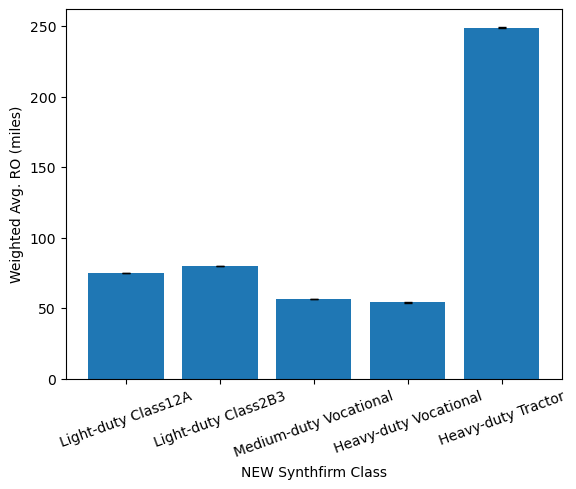

In [28]:
# Plot the weighted_avg and 95% CI by vehivle class

plt.bar(x=results.index, height=results['weighted_avg'], yerr=results['ci'], capsize=3)
plt.xlabel('NEW Synthfirm Class')
plt.xticks(rotation=20)
plt.ylabel('Weighted Avg. RO (miles)')

### RO Bins

In [29]:
# Create average range of operation bin (applicable for heavy-duty tractor only)

# Define bins and labels
bins = [-float('inf'), 50, 100, 200, 500, float('inf')]
labels = ['RO<=50', '50<RO<=100', '100<RO<=200', '200<RO<=500', 'RO>500']

# Create age_bin variable
df['RO_BIN1'] = pd.cut(df['wgt_avg_RO'], bins=bins, labels=labels, include_lowest=True, right=True)

df['RO_BIN1'].value_counts().sort_index()

RO_BIN1
RO<=50         22018
50<RO<=100      5906
100<RO<=200     2780
200<RO<=500     2251
RO>500          2187
Name: count, dtype: int64

In [30]:
pd.crosstab(df['VEH_CLASS_MOVES'], df['RO_BIN1']) 

RO_BIN1,RO<=50,50<RO<=100,100<RO<=200,200<RO<=500,RO>500
VEH_CLASS_MOVES,,,,,
Combination long-haul truck,243,535,1352,1729,1951
Combination short-haul truck,3769,1784,260,32,0
Light commercial truck,2050,445,192,90,47
Single-unit long-haul truck,146,173,710,357,189
Single-unit short-haul truck,15810,2969,266,43,0


# Writing output

In [31]:
df.to_csv('Input/vius_2021_com_crosswalk_20240624.csv')

## Making Bar Charts

### By MOVES Class

/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/2076286230.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(['VEH_CLASS_MOVES'])['weighted_VMT'].sum().reset_index()


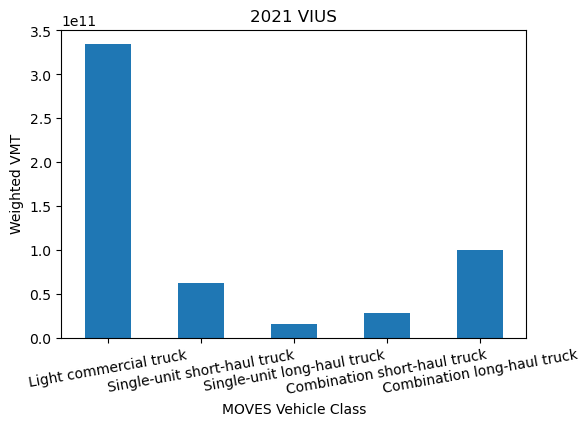

In [32]:
# Define the specific order for the 'Category' column
new_order = ['Light commercial truck', 'Single-unit short-haul truck', 'Single-unit long-haul truck','Combination short-haul truck','Combination long-haul truck']

# Convert 'Category' to a categorical type with the defined order
df['VEH_CLASS_MOVES'] = pd.Categorical(df['VEH_CLASS_MOVES'], categories=new_order, ordered=True)

# Aggregate data by 'VEH_CLASS_MOVES', then calculate total weighted VMT for each group
agg_df = df.groupby(['VEH_CLASS_MOVES'])['weighted_VMT'].sum().reset_index()

# Prepare the plot 
fig, ax = plt.subplots(figsize=(6, 4))
agg_df.plot(kind='bar', x='VEH_CLASS_MOVES', y='weighted_VMT', ax=ax, legend=False)

# Customizing the plot
plt.title('2021 VIUS')
plt.xlabel('MOVES Vehicle Class') 
plt.ylabel('Weighted VMT')
plt.xticks(rotation=10)

# Show the plot
plt.show()

/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/2694340489.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(['VEH_CLASS_MOVES'])['TABWEIGHT'].sum().reset_index()


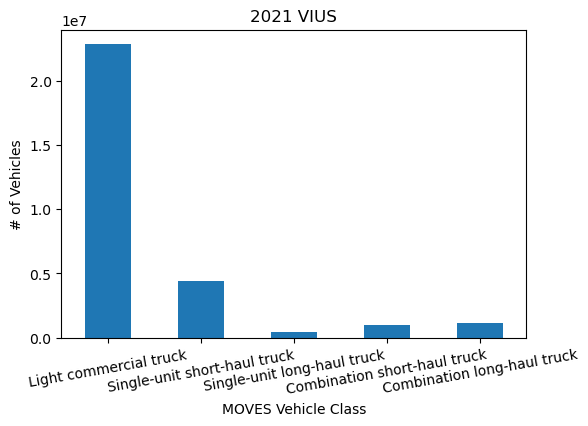

In [33]:
# Aggregate data by 'VEH_CLASS_MOVES', then calculate total weight for each group
agg_df = df.groupby(['VEH_CLASS_MOVES'])['TABWEIGHT'].sum().reset_index()

# Prepare the plot 
fig, ax = plt.subplots(figsize=(6, 4))
agg_df.plot(kind='bar', x='VEH_CLASS_MOVES', y='TABWEIGHT', ax=ax, legend=False)

# Customizing the plot
plt.title('2021 VIUS')
plt.xlabel('MOVES Vehicle Class') 
plt.ylabel('# of Vehicles')
plt.xticks(rotation=10)

# Show the plot
plt.show()

### By GVWR Vehicle Class

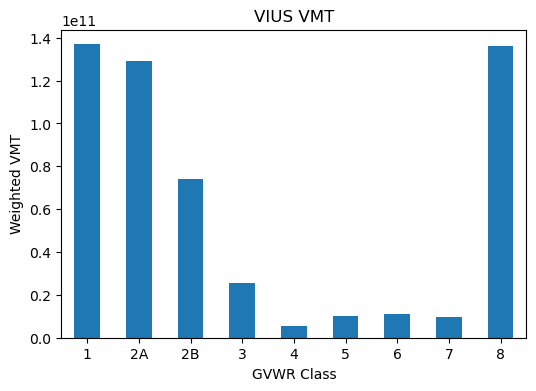

In [34]:
# Aggregate data by 'GVWR_CLASS', then calculate total weighted VMT for each group
agg_df = df.groupby(['GVWR_CLASS'])['weighted_VMT'].sum().reset_index()

# Prepare the plot 
fig, ax = plt.subplots(figsize=(6, 4))
agg_df.plot(kind='bar', x='GVWR_CLASS', y='weighted_VMT', ax=ax, legend=False)

# Customizing the plot
plt.title('VIUS VMT')
plt.xlabel('GVWR Class') 
plt.ylabel('Weighted VMT')
plt.xticks(rotation=0)

# Show the plot
plt.show()

### Age Bin by GVWR Vehicle Class

In [35]:
# Step 1: Aggregate data by 'GVWR' and 'age bin', then calculate the total count for each group
agg_df = df.groupby(['GVWR_CLASS', 'AGE_BIN'])['TABWEIGHT'].count().reset_index()

# Step 2: Calculate the total count for each 'GVWR' to find the share of each 'age bin'
total_weights = agg_df.groupby('GVWR_CLASS')['TABWEIGHT'].sum().reset_index().rename(columns={'TABWEIGHT': 'total_weight'})
agg_df = agg_df.merge(total_weights, on='GVWR_CLASS')
agg_df['share'] = agg_df['TABWEIGHT'] / agg_df['total_weight']

/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/3463123325.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(['GVWR_CLASS', 'AGE_BIN'])['TABWEIGHT'].count().reset_index()


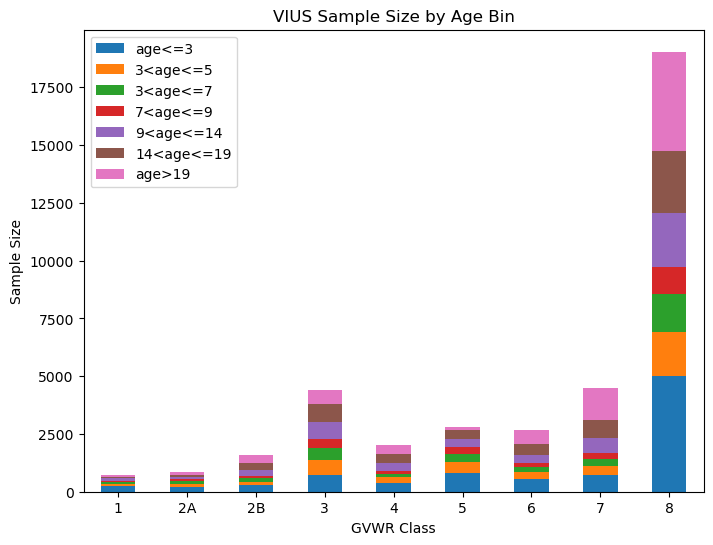

In [36]:
# Pivot the data for plotting
pivot_df = agg_df.pivot(index='GVWR_CLASS', columns='AGE_BIN', values='TABWEIGHT').fillna(0)

# Prepare the plot 
fig, ax = plt.subplots(figsize=(8, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)

# Customizing the plot
plt.title('VIUS Sample Size by Age Bin')
plt.xlabel('GVWR Class') 
plt.ylabel('Sample Size')
plt.xticks(rotation=0)
plt.legend(title='Age Bin')
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [37]:
# Step 1: Aggregate data by 'GVWR' and 'age bin', then calculate total weight for each group
agg_df = df.groupby(['GVWR_CLASS', 'AGE_BIN'])['TABWEIGHT'].sum().reset_index()

# Step 2: Calculate the total weight for each 'GVWR' to find the share of each 'age bin'
total_weights = agg_df.groupby('GVWR_CLASS')['TABWEIGHT'].sum().reset_index().rename(columns={'TABWEIGHT': 'total_weight'})
agg_df = agg_df.merge(total_weights, on='GVWR_CLASS')
agg_df['share'] = agg_df['TABWEIGHT'] / agg_df['total_weight']

/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/1271354541.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(['GVWR_CLASS', 'AGE_BIN'])['TABWEIGHT'].sum().reset_index()


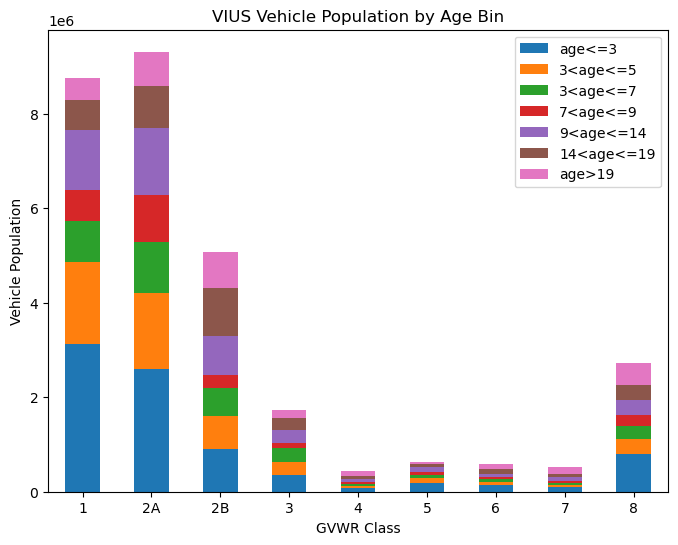

In [38]:
# Pivot the data for plotting
pivot_df = agg_df.pivot(index='GVWR_CLASS', columns='AGE_BIN', values='TABWEIGHT').fillna(0)

# Prepare the plot 
fig, ax = plt.subplots(figsize=(8, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)

# Customizing the plot
plt.title('VIUS Vehicle Population by Age Bin')
plt.xlabel('GVWR Class') 
plt.ylabel('Vehicle Population')
plt.xticks(rotation=0)
plt.legend(title='Age Bin')
plt.legend(loc='upper right')

# Show the plot
plt.show()

### Age Bin by MOVES Vehicle Class

In [39]:
# Step 1: Aggregate data by 'VEH_CLASS_MOVES' and 'age bin', then calculate total weight for each group
agg_df = df.groupby(['VEH_CLASS_MOVES', 'AGE_BIN'])['TABWEIGHT'].sum().reset_index()

# Step 2: Calculate the total weight for each 'VEH_CLASS_MOVES' to find the share of each 'age bin'
total_weights = agg_df.groupby('VEH_CLASS_MOVES')['TABWEIGHT'].sum().reset_index().rename(columns={'TABWEIGHT': 'total_weight'})
agg_df = agg_df.merge(total_weights, on='VEH_CLASS_MOVES')
agg_df['share'] = agg_df['TABWEIGHT'] / agg_df['total_weight']

/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/322980858.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(['VEH_CLASS_MOVES', 'AGE_BIN'])['TABWEIGHT'].sum().reset_index()
/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/322980858.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_weights = agg_df.groupby('VEH_CLASS_MOVES')['TABWEIGHT'].sum().reset_index().rename(columns={'TABWEIGHT': 'total_weight'})


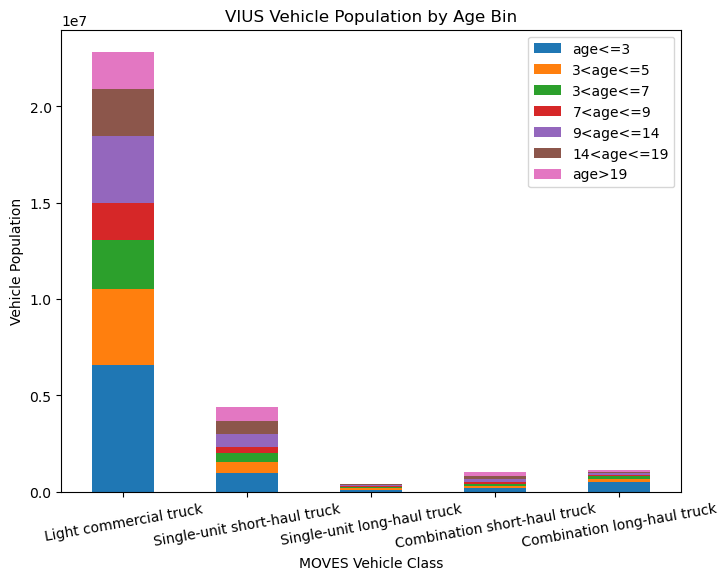

In [40]:
# Pivot the data for plotting
pivot_df = agg_df.pivot(index='VEH_CLASS_MOVES', columns='AGE_BIN', values='TABWEIGHT').fillna(0)

# Prepare the plot 
fig, ax = plt.subplots(figsize=(8, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)

# Customizing the plot
plt.title('VIUS Vehicle Population by Age Bin')
plt.xlabel('MOVES Vehicle Class') 
plt.ylabel('Vehicle Population')
plt.xticks(rotation=10)
plt.legend(title='Age Bin')
plt.legend(loc='upper right')

# Show the plot
plt.show()

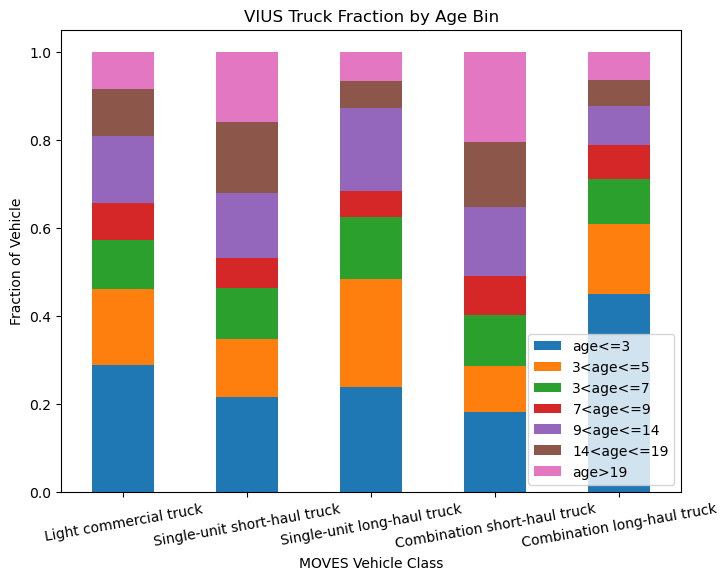

In [41]:
# Pivot the data for plotting
pivot_df = agg_df.pivot(index='VEH_CLASS_MOVES', columns='AGE_BIN', values='share').fillna(0)

# Prepare the plot 
fig, ax = plt.subplots(figsize=(8, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)

# Customizing the plot
plt.title('VIUS Truck Fraction by Age Bin')
plt.xlabel('MOVES Vehicle Class') 
plt.ylabel('Fraction of Vehicle')
plt.xticks(rotation=10)
plt.legend(title='Age Bin')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [42]:
# Step 1: Aggregate data by 'VEH_CLASS_MOVES' and 'age bin', then calculate total weighted VMT for each group
agg_df = df.groupby(['VEH_CLASS_MOVES', 'AGE_BIN'])['weighted_VMT'].sum().reset_index()

# Step 2: Calculate the total weighted VMT for each 'VEH_CLASS_MOVES' to find the share of each 'age bin'
total_weights = agg_df.groupby('VEH_CLASS_MOVES')['weighted_VMT'].sum().reset_index().rename(columns={'weighted_VMT': 'total_weight'})
agg_df = agg_df.merge(total_weights, on='VEH_CLASS_MOVES')
agg_df['share'] = agg_df['weighted_VMT'] / agg_df['total_weight']

/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/2694460848.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(['VEH_CLASS_MOVES', 'AGE_BIN'])['weighted_VMT'].sum().reset_index()
/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/2694460848.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_weights = agg_df.groupby('VEH_CLASS_MOVES')['weighted_VMT'].sum().reset_index().rename(columns={'weighted_VMT': 'total_weight'})


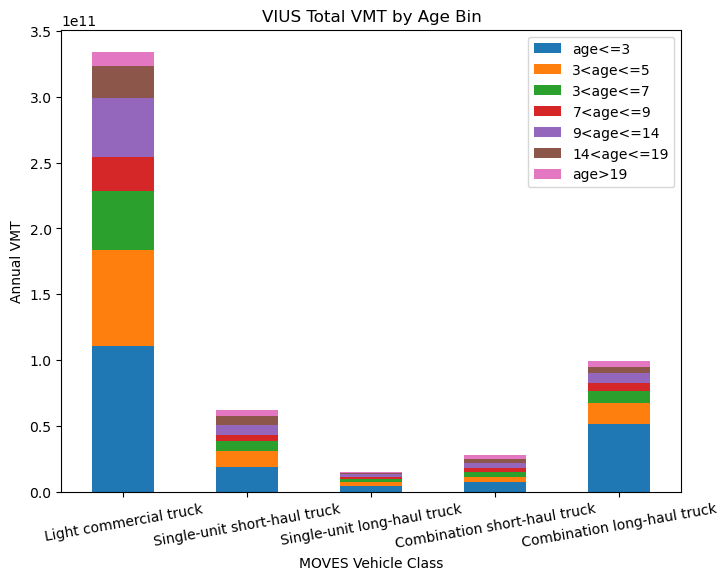

In [43]:
# Pivot the data for plotting
pivot_df = agg_df.pivot(index='VEH_CLASS_MOVES', columns='AGE_BIN', values='weighted_VMT').fillna(0)

# Prepare the plot 
fig, ax = plt.subplots(figsize=(8, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)

# Customizing the plot
plt.title('VIUS Total VMT by Age Bin')
plt.xlabel('MOVES Vehicle Class') 
plt.ylabel('Annual VMT')
plt.xticks(rotation=10)
plt.legend(title='Age Bin')
plt.legend(loc='upper right')

# Show the plot
plt.show()

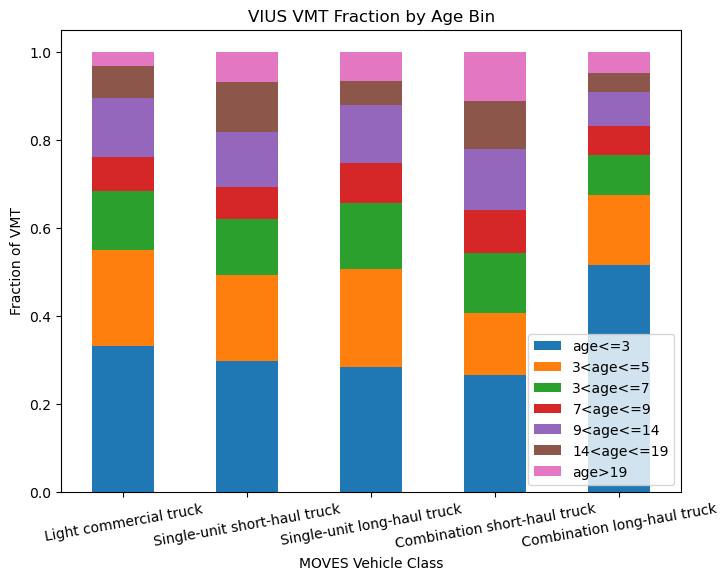

In [44]:
# Pivot the data for plotting
pivot_df = agg_df.pivot(index='VEH_CLASS_MOVES', columns='AGE_BIN', values='share').fillna(0)

# Prepare the plot 
fig, ax = plt.subplots(figsize=(8, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)

# Customizing the plot
plt.title('VIUS VMT Fraction by Age Bin')
plt.xlabel('MOVES Vehicle Class') 
plt.ylabel('Fraction of VMT')
plt.xticks(rotation=10)
plt.legend(title='Age Bin')
plt.legend(loc='lower right')

# Show the plot
plt.show()

### Fuel Type by MOVES Vehicle Class

In [45]:
# Step 1: Aggregate data by 'VEH_CLASS_MOVES' and 'fuel type', then calculate total weighted for each group
agg_df = df.groupby(['VEH_CLASS_MOVES', 'FUELTYPE'])['TABWEIGHT'].sum().reset_index()

# Step 2: Calculate the total weight for each 'VEH_CLASS_MOVES' to find the share of each 'fuel type'
total_weights = agg_df.groupby('VEH_CLASS_MOVES')['TABWEIGHT'].sum().reset_index().rename(columns={'TABWEIGHT': 'total_weight'})
agg_df = agg_df.merge(total_weights, on='VEH_CLASS_MOVES')
agg_df['share'] = agg_df['TABWEIGHT'] / agg_df['total_weight']

/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/3937120518.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(['VEH_CLASS_MOVES', 'FUELTYPE'])['TABWEIGHT'].sum().reset_index()
/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/3937120518.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_weights = agg_df.groupby('VEH_CLASS_MOVES')['TABWEIGHT'].sum().reset_index().rename(columns={'TABWEIGHT': 'total_weight'})


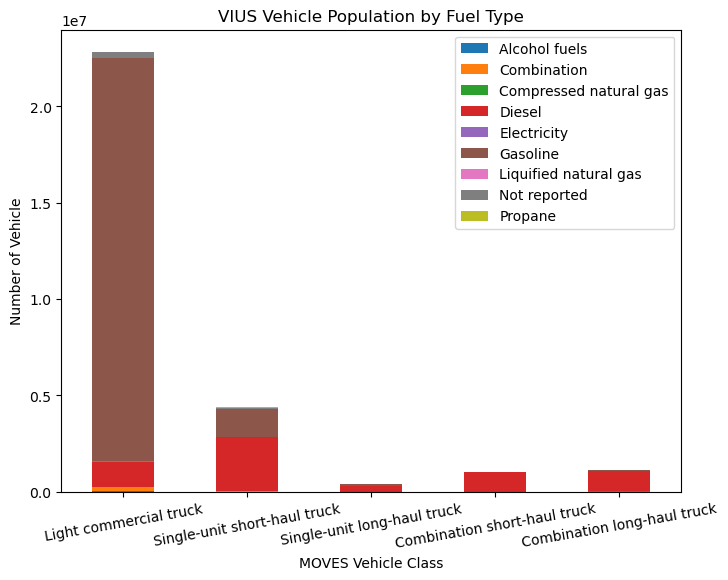

In [46]:
# Pivot the data for plotting
pivot_df = agg_df.pivot(index='VEH_CLASS_MOVES', columns='FUELTYPE', values='TABWEIGHT').fillna(0)

# Prepare the plot 
fig, ax = plt.subplots(figsize=(8, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)

# Customizing the plot
plt.title('VIUS Vehicle Population by Fuel Type')
plt.xlabel('MOVES Vehicle Class') 
plt.ylabel('Number of Vehicle')
plt.xticks(rotation=10)
plt.legend(title='Fuel Type')
plt.legend(loc='upper right')

# Show the plot
plt.show()

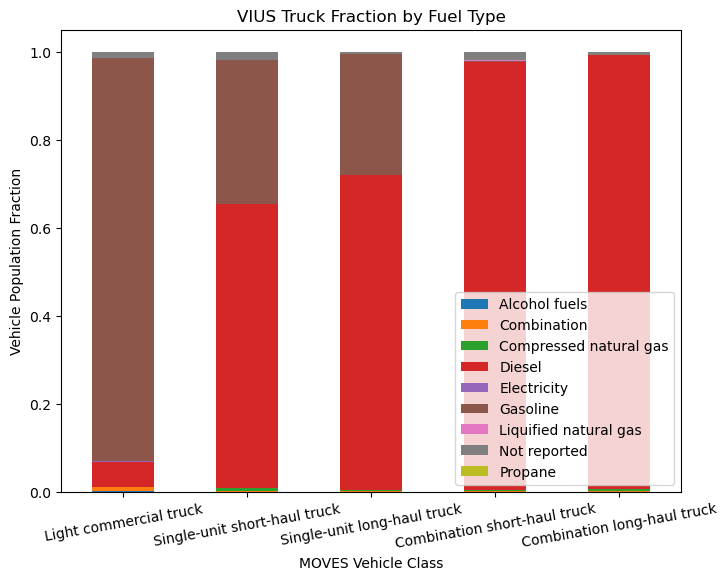

In [47]:
# Pivot the data for plotting
pivot_df = agg_df.pivot(index='VEH_CLASS_MOVES', columns='FUELTYPE', values='share').fillna(0)

# Prepare the plot 
fig, ax = plt.subplots(figsize=(8, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)

# Customizing the plot
plt.title('VIUS Truck Fraction by Fuel Type')
plt.xlabel('MOVES Vehicle Class') 
plt.ylabel('Vehicle Population Fraction')
plt.xticks(rotation=10)
plt.legend(title='Fuel Type')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [48]:
# Step 1: Aggregate data by 'VEH_CLASS_MOVES' and 'fuel type', then calculate total weighted VMT for each group
agg_df = df.groupby(['VEH_CLASS_MOVES', 'FUELTYPE'])['weighted_VMT'].sum().reset_index()

# Step 2: Calculate the total weighted VMT for each 'VEH_CLASS_MOVES' to find the share of each 'fuel type'
total_weights = agg_df.groupby('VEH_CLASS_MOVES')['weighted_VMT'].sum().reset_index().rename(columns={'weighted_VMT': 'total_weight'})
agg_df = agg_df.merge(total_weights, on='VEH_CLASS_MOVES')
agg_df['share'] = agg_df['weighted_VMT'] / agg_df['total_weight']

/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/2741624147.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(['VEH_CLASS_MOVES', 'FUELTYPE'])['weighted_VMT'].sum().reset_index()
/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/2741624147.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_weights = agg_df.groupby('VEH_CLASS_MOVES')['weighted_VMT'].sum().reset_index().rename(columns={'weighted_VMT': 'total_weight'})


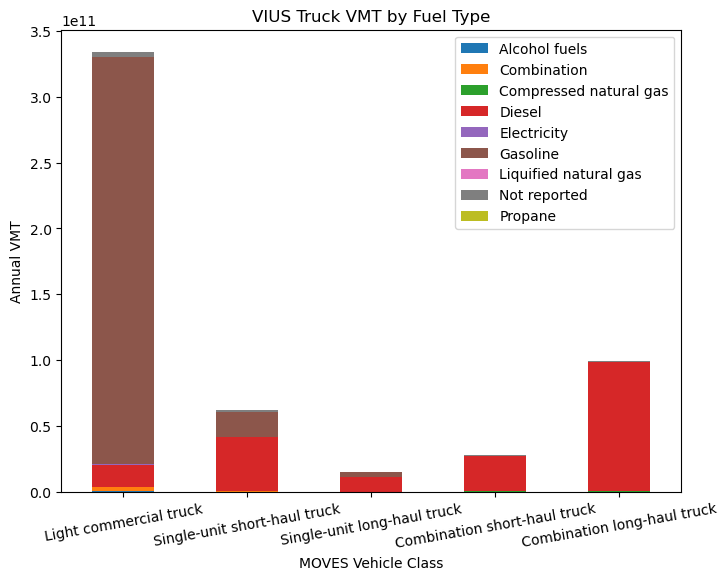

In [49]:
# Pivot the data for plotting
pivot_df = agg_df.pivot(index='VEH_CLASS_MOVES', columns='FUELTYPE', values='weighted_VMT').fillna(0)

# Prepare the plot 
fig, ax = plt.subplots(figsize=(8, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)

# Customizing the plot
plt.title('VIUS Truck VMT by Fuel Type')
plt.xlabel('MOVES Vehicle Class') 
plt.ylabel('Annual VMT')
plt.xticks(rotation=10)
plt.legend(title='Fuel Type')
plt.legend(loc='upper right')

# Show the plot
plt.show()

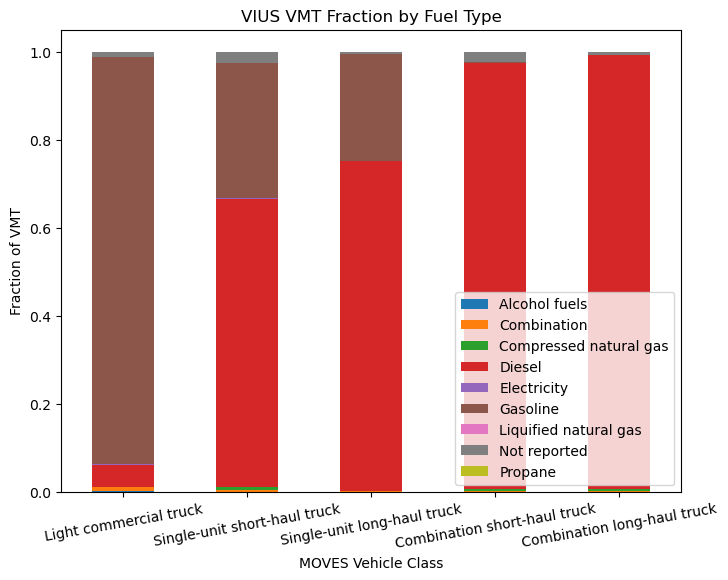

In [50]:
# Pivot the data for plotting
pivot_df = agg_df.pivot(index='VEH_CLASS_MOVES', columns='FUELTYPE', values='share').fillna(0)

# Prepare the plot 
fig, ax = plt.subplots(figsize=(8, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)

# Customizing the plot
plt.title('VIUS VMT Fraction by Fuel Type')
plt.xlabel('MOVES Vehicle Class') 
plt.ylabel('Fraction of VMT')
plt.xticks(rotation=10)
plt.legend(title='Fuel Type')
plt.legend(loc='lower right')

# Show the plot
plt.show()

### Primary Usage by MOVES Vehicle Class

In [51]:
# Step 1: Aggregate data by 'VEH_CLASS_MOVES' and 'PRIMCOMMACT', then calculate total weight for each group
agg_df = df.groupby(['VEH_CLASS_MOVES', 'PRIMCOMMACT'])['TABWEIGHT'].sum().reset_index()

# Step 2: Calculate the total weight for each 'VEH_CLASS_MOVES' to find the share of each 'PRIMCOMMACT'
total_weights = agg_df.groupby('VEH_CLASS_MOVES')['TABWEIGHT'].sum().reset_index().rename(columns={'TABWEIGHT': 'total_weight'})
agg_df = agg_df.merge(total_weights, on='VEH_CLASS_MOVES')
agg_df['share'] = agg_df['TABWEIGHT'] / agg_df['total_weight']

/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/493477309.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(['VEH_CLASS_MOVES', 'PRIMCOMMACT'])['TABWEIGHT'].sum().reset_index()
/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/493477309.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_weights = agg_df.groupby('VEH_CLASS_MOVES')['TABWEIGHT'].sum().reset_index().rename(columns={'TABWEIGHT': 'total_weight'})


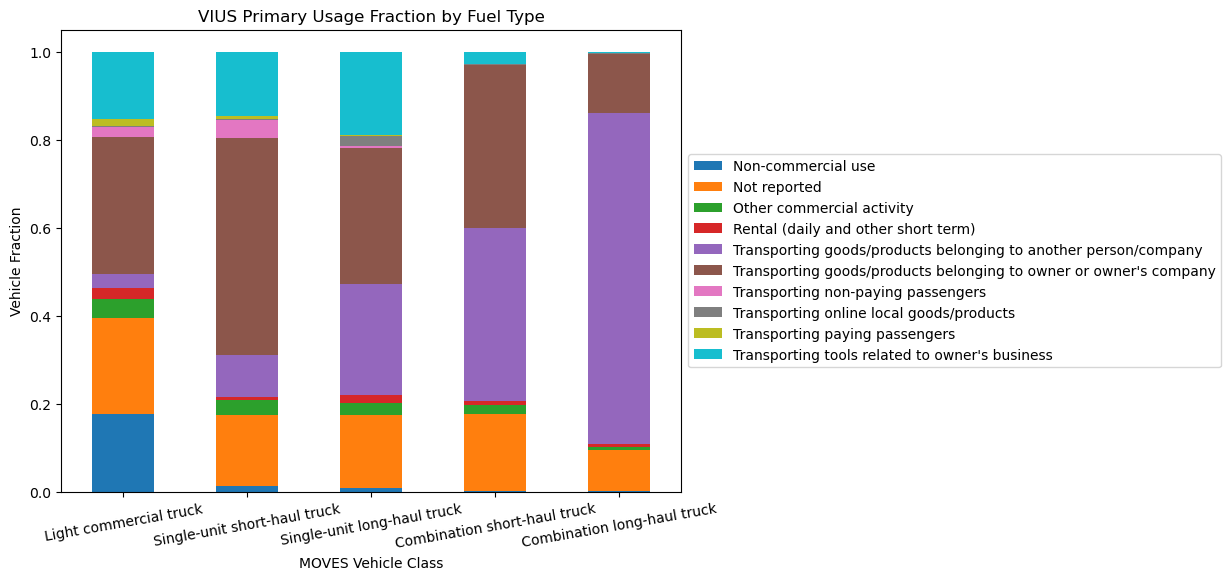

In [52]:
# Pivot the data for plotting
pivot_df = agg_df.pivot(index='VEH_CLASS_MOVES', columns='PRIMCOMMACT', values='share').fillna(0)

# Prepare the plot 
fig, ax = plt.subplots(figsize=(8, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)

# Customizing the plot
plt.title('VIUS Primary Usage Fraction by Fuel Type')
plt.xlabel('MOVES Vehicle Class') 
plt.ylabel('Vehicle Fraction')
plt.xticks(rotation=10)
plt.legend(title='Fuel Type')
plt.legend(bbox_to_anchor=(1.00, 0.5), loc='center left')

# Show the plot
plt.show()

### Home Base by MOVES Vehicle Class

In [53]:
# Step 1: Aggregate data by 'VEH_CLASS_MOVES' and 'HBTYPE', then calculate total weight for each group
agg_df = df.groupby(['VEH_CLASS_MOVES', 'HBTYPE'])['TABWEIGHT'].sum().reset_index()

# Step 2: Calculate the total weight for each 'VEH_CLASS_MOVES' to find the share of each 'HBTYPE'
total_weights = agg_df.groupby('VEH_CLASS_MOVES')['TABWEIGHT'].sum().reset_index().rename(columns={'TABWEIGHT': 'total_weight'})
agg_df = agg_df.merge(total_weights, on='VEH_CLASS_MOVES')
agg_df['share'] = agg_df['TABWEIGHT'] / agg_df['total_weight']

/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/2775457016.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(['VEH_CLASS_MOVES', 'HBTYPE'])['TABWEIGHT'].sum().reset_index()
/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/2775457016.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_weights = agg_df.groupby('VEH_CLASS_MOVES')['TABWEIGHT'].sum().reset_index().rename(columns={'TABWEIGHT': 'total_weight'})


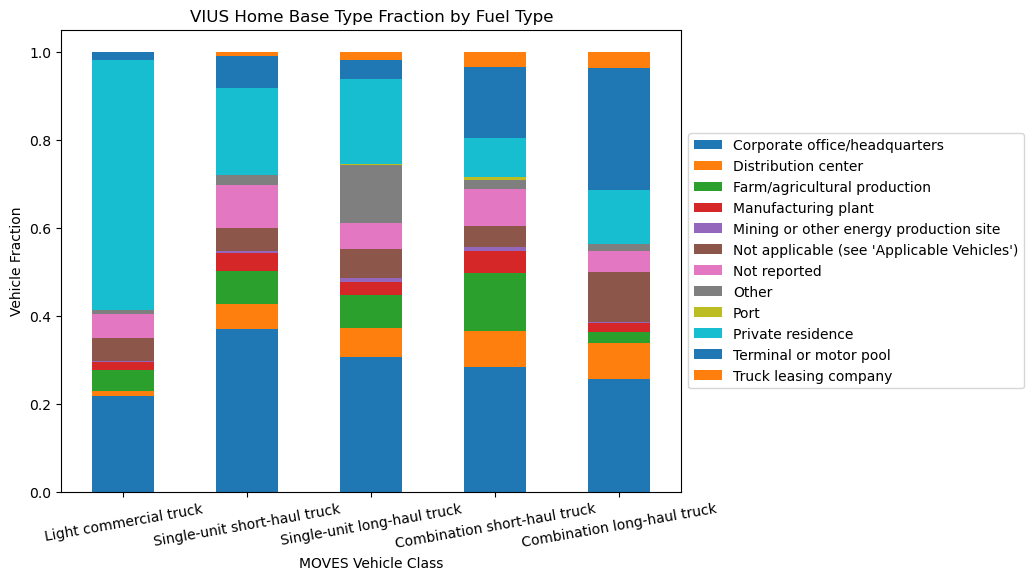

In [54]:
# Pivot the data for plotting
pivot_df = agg_df.pivot(index='VEH_CLASS_MOVES', columns='HBTYPE', values='share').fillna(0)

# Prepare the plot 
fig, ax = plt.subplots(figsize=(8, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)

# Customizing the plot
plt.title('VIUS Home Base Type Fraction by Fuel Type')
plt.xlabel('MOVES Vehicle Class') # ax.set_xlabel('GVWR')
plt.ylabel('Vehicle Fraction')
plt.xticks(rotation=10)
plt.legend(title='Fuel Type')
plt.legend(bbox_to_anchor=(1.00, 0.5), loc='center left')

# Show the plot
plt.show()

/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_24942/3157713960.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(['VEH_CLASS_MOVES', 'AGE_BIN']).apply(weighted_avg).reset_index(name='weighted_avg_mileage')
/Users/xiaodanxu/anaconda3/envs/mamba/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xiaodanxu/anaconda3/envs/mamba/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt t

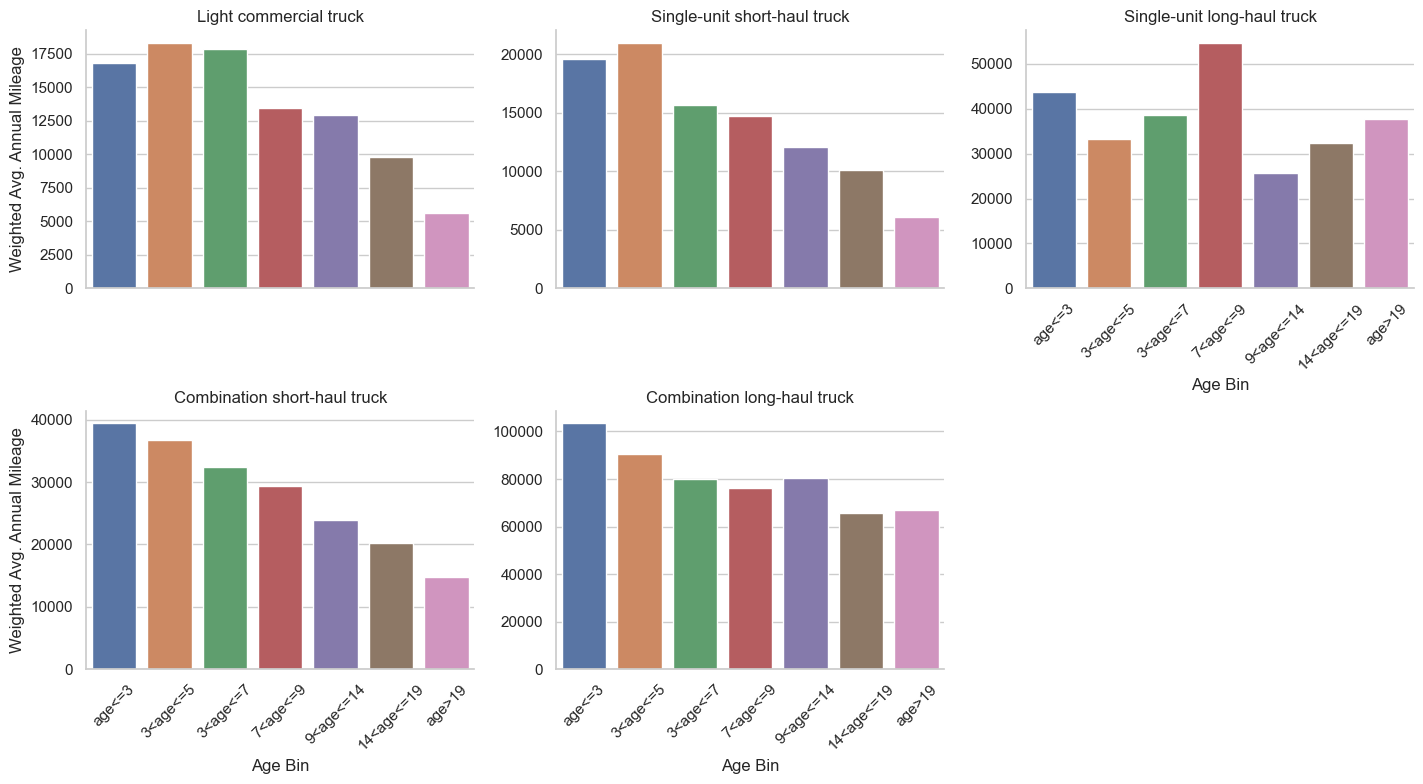

In [55]:
# Define a function for weighted average
def weighted_avg(group):
    return (group['MILESANNL'] * group['TABWEIGHT']).sum() / group['TABWEIGHT'].sum()

# Aggregate data by 'VEH_CLASS_MOVES' and 'age bin', then calculate the weighted average annual mileage for each group
agg_df = df.groupby(['VEH_CLASS_MOVES', 'AGE_BIN']).apply(weighted_avg).reset_index(name='weighted_avg_mileage')

# Set Seaborn style
sns.set(style="whitegrid")

# Create the bar plot
g = sns.catplot(
    data=agg_df,
    kind="bar",
    x="AGE_BIN",
    y="weighted_avg_mileage",
    col="VEH_CLASS_MOVES",
    col_wrap=3,  
    height=4,
    aspect=1.2,
    sharey=False
)

# Improve labeling
g.set_axis_labels("Age Bin", "Weighted Avg. Annual Mileage")
g.set_titles("{col_name}")

# Rotate x-tick labels for all subplots
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()